# volmc demo

In [1]:
from volmc import Path, State, SimulationResult
from volmc import Heston, BlackScholes
from volmc import EulerHeston, EulerBlackScholes, QE
from volmc import MonteCarlo

import matplotlib.pyplot as plt
import numpy as np

## Black-Scholes

In [2]:
bs = BlackScholes(mu = 0.02, sigma = 0.15)
montecarlo = MonteCarlo(
    EulerBlackScholes(bs))
montecarlo.configure(seed=1)

In [3]:
sim = montecarlo.generate(S0 = 100, n = 252, T = 1, n_paths= 100000)

In [4]:
sim

SimulationResult of 100000 paths and 253 steps

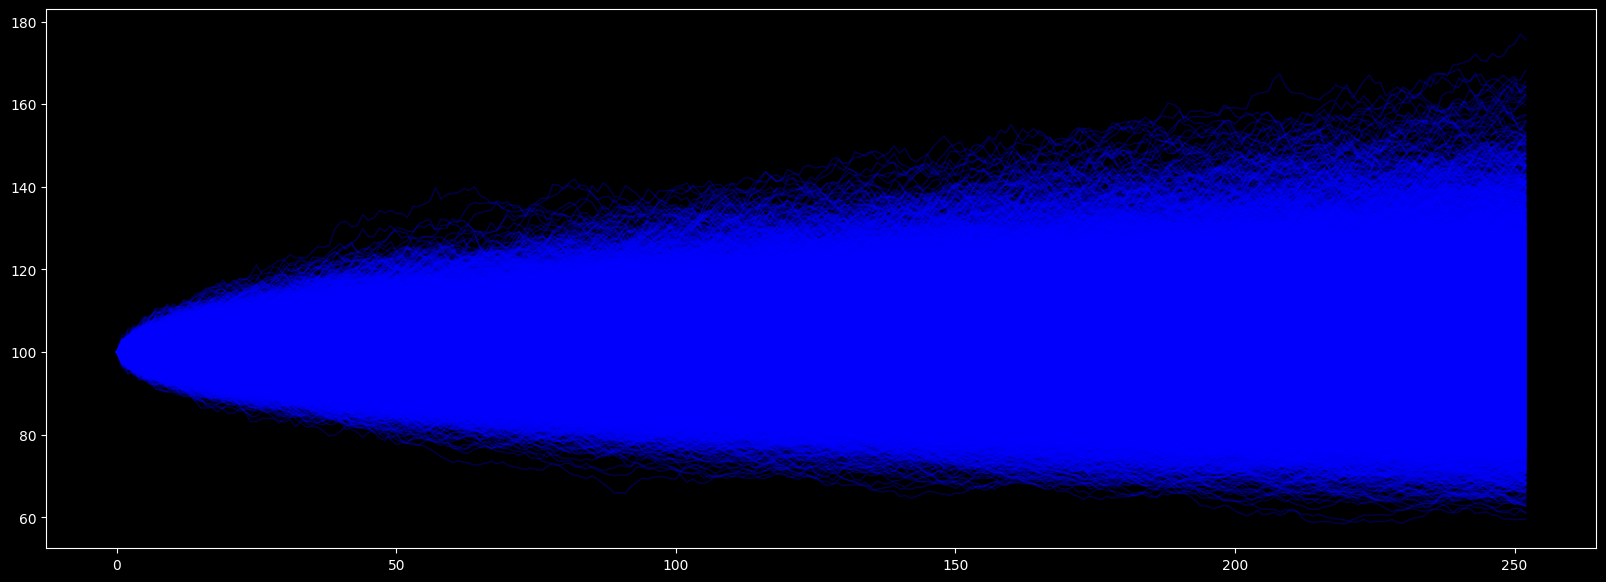

In [5]:
S = sim.spot_values()

%matplotlib inline
plt.style.use("dark_background")
plt.figure(figsize=(20,7))

for s in S[::10]: 
    plt.plot(s, color="blue", lw=1, alpha=0.3)
plt.show()

## Heston

In [6]:
heston = Heston(mu=0.02, 
                kappa=2, 
                theta= 0.1, 
                epsilon=0.3, 
                rho = -0.6)

print(f"Feller condition met : {heston.feller_condition()}")

Feller condition met : True


In [7]:
mc = MonteCarlo(
    EulerHeston(heston))
mc.configure(seed=1)

In [8]:
sim = mc.generate(S0=100, n=252, T=1, n_paths=100000, v0=0.15)

In [9]:
S = sim.spot_values()
V = sim.var_values()

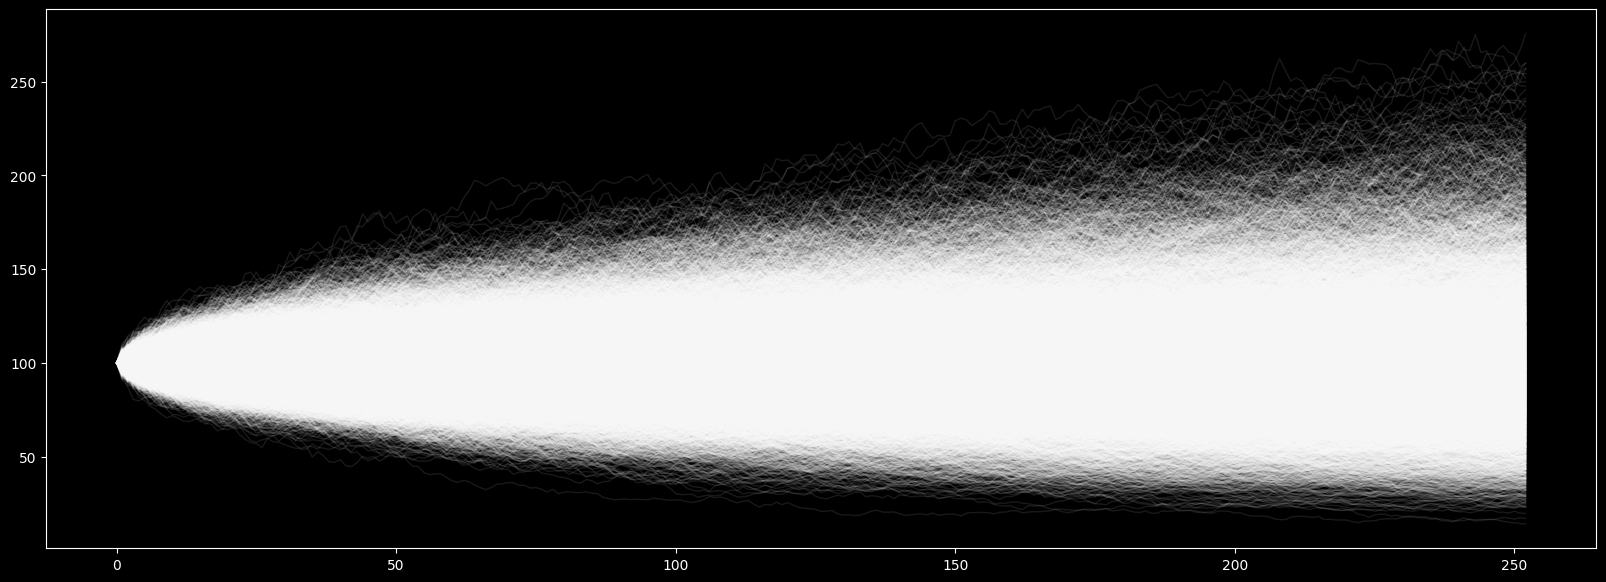

In [10]:
plt.figure(figsize=(20,7))

for s in S[::10]:
    plt.plot(s, color = "white", lw = 1, alpha= 0.1)
plt.show()

In [11]:
np.mean((S[:, -1]))

102.0967

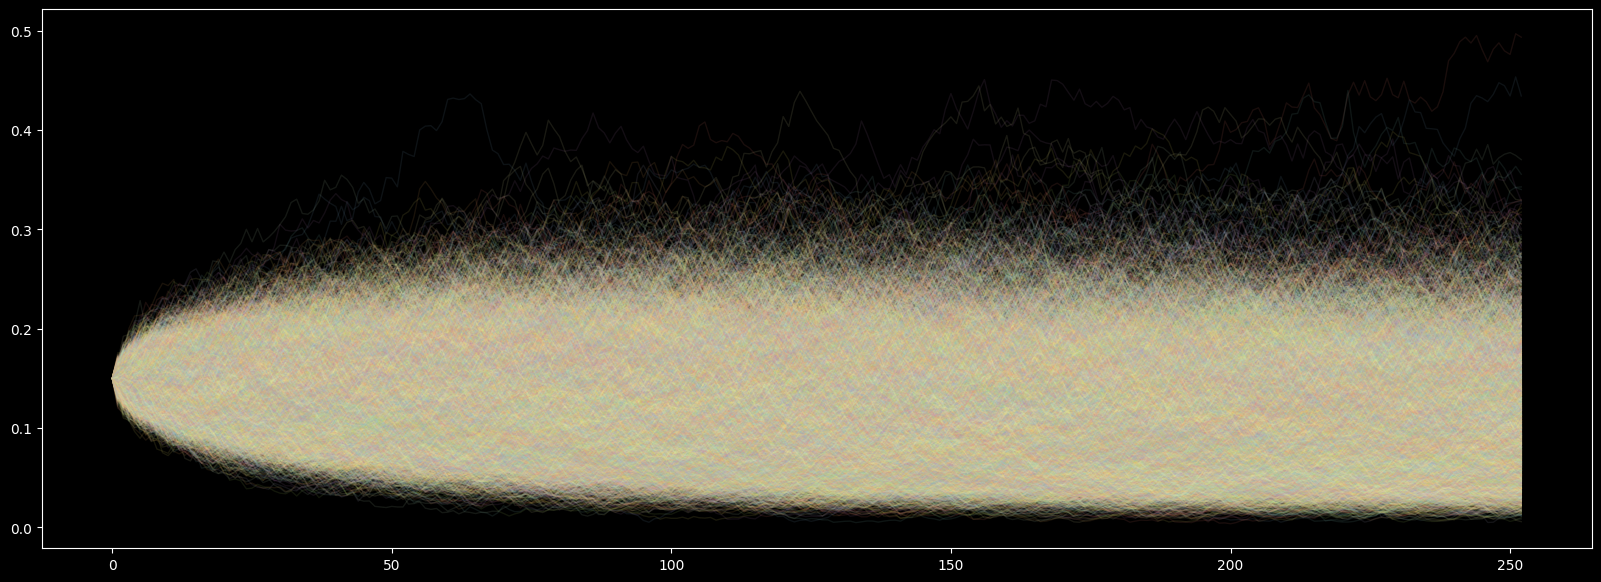

In [12]:
plt.figure(figsize=(20,7))

for v in V[::10]:
    plt.plot(v, lw = 1, alpha= 0.1)
plt.show()

In [22]:
heston = Heston(mu=0.02, 
                kappa=2, 
                theta= 0.1, 
                epsilon=0.3, 
                rho = -0.6)

print(f"Feller condition met : {heston.feller_condition()}")

Feller condition met : True


In [23]:
mc = MonteCarlo(
    QE(heston))
mc.configure(seed=1)

sim = mc.generate(S0 = 100, v0 = 0.15, n = 252, T = 1, n_paths = 100_000)

S = sim.spot_values()
V = sim.var_values()

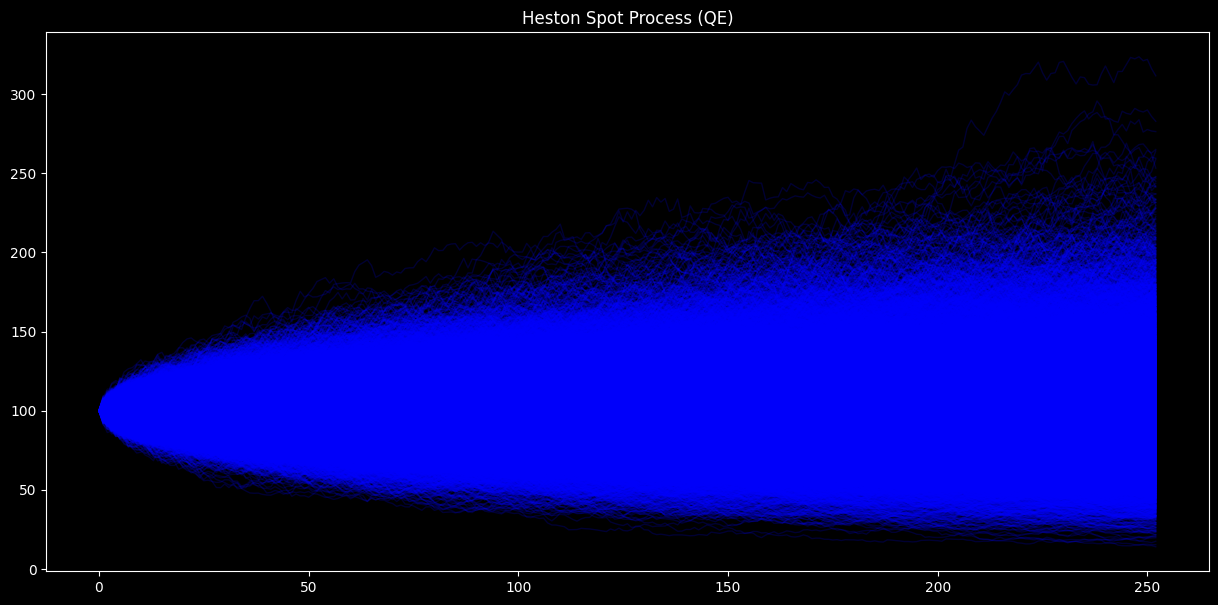

In [30]:
plt.figure(figsize=(15,7))

for s in S[::10]:
    plt.plot(s, color = "blue", lw = 1, alpha= 0.2)
plt.title("Heston Spot Process (QE)")
plt.show()

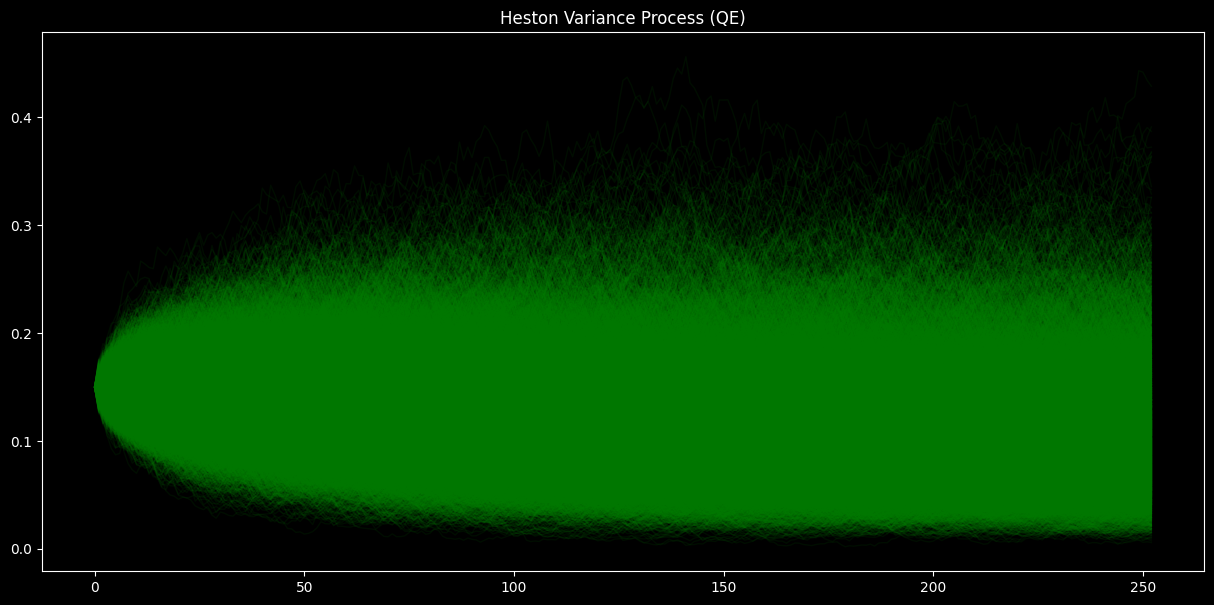

In [31]:
plt.figure(figsize=(15,7))

for v in V[::10]:
    plt.plot(v, color = "green", lw = 1, alpha= 0.1)
plt.title("Heston Variance Process (QE)")
plt.show()